# Basic characteristics

## Importing graphs

In [ ]:
#!pip install networkx
import networkx as nx

In [4]:
SNet = nx.read_gml("data/graphs/snet.gml")
SNetF = nx.read_gml("data/graphs/snetf.gml")
SNetT = nx.read_gml("data/graphs/snett.gml")
UserNet = nx.read_gml("data/graphs/usernet.gml")

In [5]:
print(nx.info(SNet))
print(nx.info(SNetF))
print(nx.info(SNetT))
print(nx.info(UserNet))

Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 135974
Average degree:  64.8886
Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 6113
Average degree:   2.9172
Name: 
Type: Graph
Number of nodes: 39
Number of edges: 741
Average degree:  38.0000
Name: 
Type: DiGraph
Number of nodes: 18975
Number of edges: 102043
Average in degree:   5.3778
Average out degree:   5.3778


##  [Gephi tool](www.gephi.org) shared code for import

Shared code markdown for better reusability

In [6]:
from IPython.display import Markdown as md
import codecs

def show_graph_model(path):
    display(md(f"<img src='{path}model.png' alt='model' width='500'/>"))

def show_density_report(path):
    density_report_path="density-report/report.html"
    with open(path + density_report_path, "r", encoding='utf-8') as f:
        text= f.read()
        display(md(text)) 
        
def show_distance_report(path):
    distance_report_path="distance-report/report.html"
    with open(path + distance_report_path, "r", encoding='utf-8') as f:
        text= f.read()
        display(md(text)) 

## General python shared code

# SNet

In [7]:
print(nx.info(SNet))

Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 135974
Average degree:  64.8886


</HTML><img src="data/gephi/SNet/model.png" alt="model" width="500"/>

## 7 Graph density

<HTML> <BODY> <h3>Graph Density  Report - Results:</h3> <hr>Density: <b>0.015</b><br />

## 8 Avrage Distance in graph & The diameter

<HTML> <BODY> <h3>Graph Distance  Report - Results:</h3> <hr>Diameter: <b>5</b><br />Radius: <b>0</b><br />Average Path length: <b>2.1072775194289464</b><br />
    <table>
  <tr>
    <td><IMG SRC="data/gephi/SNet/distance-report/Betweenness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
    <td><IMG SRC="data/gephi/SNet/distance-report/Closeness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
  </tr>
  <tr>
    <td><IMG SRC="data/gephi/SNet/distance-report/Eccentricity Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
    <td><IMG SRC="data/gephi/SNet/distance-report/Harmonic Closeness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
  </tr>
</table>

## 9 Connectivity

<HTML>
    <BODY> 
        <h3>Connected Components Report - Results:</h3>
        Number of Weakly Connected Components: <b>799</b><br/>
        There is <b>1</b> Gigantic component - The core is the largest part of the graph
        <table>
            <tr>
                <td><IMG SRC="data/gephi/SNet/model.png" WIDTH="300" HEIGHT="300" BORDER="0" USEMAP="#chart"></IMG></td>
                <td><IMG SRC="data/gephi/SNet/connected-components-report/cc-size-distribution.png" WIDTH="480" HEIGHT="320" BORDER="0" USEMAP="#chart"></IMG></td>
            </tr>
        </table>
        </BODY></HTML>

## 10 Average, Global and Local Clusterization

<HTML> <BODY> <h3> Clustering Coefficient Metric Report - Result: </h3> <hr>Average Clustering Coefficient: <b>0.907</b><br />Total triangles: <b>6598248</b><br />The Average Clustering Coefficient is the mean value of individual coefficients.<br /><br /><IMG SRC="data\gephi\SNet\clustering-coefficient-metric-report\clustering-coefficient.png" WIDTH="480" HEIGHT="320" BORDER="0" USEMAP="#chart"></IMG></BODY> </HTML>

In [21]:
def clustering(graph, weight=None):
    average_clustering = nx.average_clustering(graph, weight=weight)
    clustering_coefficient = [coefficient for coefficient in nx.clustering(graph, weight=weight).values() if coefficient > 0]
    global_clustering = max(clustering_coefficient)
    return average_clustering, global_clustering, clustering_coefficient

In [9]:
def create_erdos_renyi(graph, directed):
    n = graph.number_of_nodes()
    m = graph.number_of_edges()
    p = (2 * float(m)) / (n * (n - 1))
    return nx.erdos_renyi_graph(n, p, directed=directed)

In [10]:
def print_clustering_coeffs(name, average_clustering, global_clustering):
    print(f"--------------------------\t{name}'s \t--------------------------")
    print(f"Average clustering coefficient: {round(average_clustering, 6)}")
    print(f"Global clustering coefficient:  {round(global_clustering, 6)}")
    print()
    
def group_prints(g_name, g_tuple_w, g_tuple_nw, er_tuple):
    print_clustering_coeffs(f"{g_name} weighted", g_tuple_w[0], g_tuple_w[1])
    print_clustering_coeffs(f"{g_name} not-weighted", g_tuple_nw[0], g_tuple_nw[1])
    print_clustering_coeffs("Erdos-Renyi", er_tuple[0], er_tuple[1])

In [11]:
import matplotlib.pyplot as plt

def draw_versus_er_histograms(g_name, g_cc, er_cc):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f"{g_name} vs Erdos-Renyi clustering")
    ax1.hist(g_cc, bins=50)
    ax2.hist(er_cc, bins=50)

In [19]:
def test_against_er(graph, graph_name, directed=False):
    clustering_tuple_w = clustering(graph, "weight")
    clustering_tuple = clustering(graph)
    
    er = create_erdos_renyi(graph, directed)
    er_clustering_tuple = clustering(er)
    
    group_prints(graph_name, clustering_tuple_w, clustering_tuple, er_clustering_tuple)
    
    draw_versus_er_histograms(graph_name, clustering_tuple[2], er_clustering_tuple[2])
    
    return (clustering_tuple, clustering_tuple_w, er, er_clustering_tuple)

--------------------------	SNet weighted's 	--------------------------
Average clustering coefficient: 0.000247
Global clustering coefficient:  0.001219

--------------------------	SNet not-weighted's 	--------------------------
Average clustering coefficient: 0.618428
Global clustering coefficient:  1.0

--------------------------	Erdos-Renyi's 	--------------------------
Average clustering coefficient: 0.015422
Global clustering coefficient:  0.027223



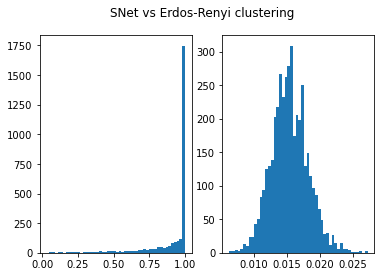

In [22]:
snet_clustering_results = test_against_er(SNet, "SNet")

We can observe that there is a lot of well connected nodes - most of them are at 1.

We can conclude that there is in fact a **pronounced clusterization** - one big cluster

--------------------------	SNetF weighted's 	--------------------------
Average clustering coefficient: 0.000523
Global clustering coefficient:  0.014698

--------------------------	SNetF not-weighted's 	--------------------------
Average clustering coefficient: 0.046684
Global clustering coefficient:  1.0

--------------------------	Erdos-Renyi's 	--------------------------
Average clustering coefficient: 0.000517
Global clustering coefficient:  1.0



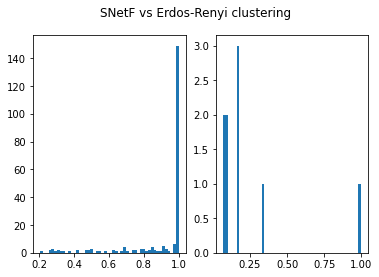

In [24]:
snetf_clustering_results = test_against_er(SNetF, "SNetF")

--------------------------	SNetT weighted's 	--------------------------
Average clustering coefficient: 0.060745
Global clustering coefficient:  0.139317

--------------------------	SNetT not-weighted's 	--------------------------
Average clustering coefficient: 1.0
Global clustering coefficient:  1.0

--------------------------	Erdos-Renyi's 	--------------------------
Average clustering coefficient: 1.0
Global clustering coefficient:  1.0



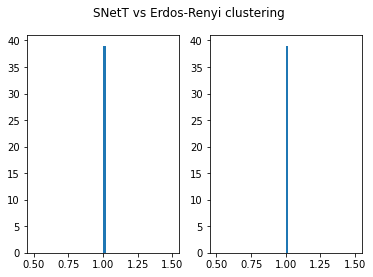

In [23]:
snett_clustering_results = test_against_er(SNetT, "SNetT")

--------------------------	UserNet weighted's 	--------------------------
Average clustering coefficient: 0.000379
Global clustering coefficient:  0.085552

--------------------------	UserNet not-weighted's 	--------------------------
Average clustering coefficient: 0.028292
Global clustering coefficient:  1.0

--------------------------	Erdos-Renyi's 	--------------------------
Average clustering coefficient: 0.000589
Global clustering coefficient:  0.015152



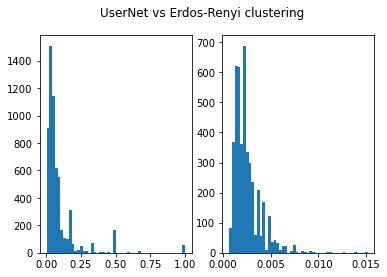

In [25]:
usernet_clustering_results = test_against_er(UserNet, "UserNet", directed=True)

## 11 *Small-world* properties? (Taking 8 and 10 into consideration)

Small world property is defined by:

    * small average distance of any two nodes against the whole network
    * high clustering degree
    
[Wiki Small world article](https://en.wikipedia.org/wiki/Small-world_network):

$$
     \sigma = \frac{\frac{C}{Cr}}{\frac{L}{Lr}} > 1  => small world
$$


In [27]:
def small_world_properties(graph_name, graph, average_distance, clustering_degree, er_avg_path, er_avg_cluster):
    print(f"----------------------{graph_name}----------------------")
    print(f"Average distance: {average_distance}")
    print(f"Clustering degree: {clustering_degree}")
    print(f"Does {graph_name} show small-world properties? {average_distance > 0.1 and clustering_degree > 0.1}")
    print(f"Wiki says: {small_world_properties_wiki(average_distance, clustering_degree, er_avg_path, er_avg_cluster)}")
#     print(f"Network X Sigma: {nx.sigma(graph) > 1}")
#     print(f"Network X Omega: {nx.omega(graph) == 0}")
#     LTE
    print("----------------------------------------------")

In [38]:
def small_world_properties2(graph_name, graph):
    print(f"Does {graph_name} show small-world properties?")
    sigma = nx.sigma(graph)
    print(f"{sigma >= 1}")

In [28]:
def small_world_properties_wiki(g_avg_path, g_avg_cluster, er_avg_path, er_avg_cluster):
    path_ratio = float(g_avg_path) / er_avg_path
    cluster_ratio = float(g_avg_cluster) / er_avg_cluster
    return (cluster_ratio / path_ratio > 1.0)

In [17]:
small_world_properties("SNet", SNet, 1, 0.907, nx.average_shortest_path_length(er_snet), er_snet_clustering_tuple[0])

----------------------SNet----------------------
Average distance: 2.10728
Clustering degree: 0.907
Does SNet show small-world properties? True
Wiki says: True
----------------------------------------------


In [29]:
small_world_properties("SNet", SNet, 2.107, 0.907, nx.average_shortest_path_length(snet_clustering_results[2]), snet_clustering_results[3][0])

----------------------SNet----------------------
Average distance: 2.107
Clustering degree: 0.907
Does SNet show small-world properties? True
Wiki says: True
----------------------------------------------


In [34]:
small_world_properties("SNetF", SNetF, 1.814, 0.889, nx.average_shortest_path_length(snetf_clustering_results[2]), snetf_clustering_results[3][0])

NetworkXError: Graph is not connected.

In [35]:
small_world_properties("SNetT", SNetT, 1, 1, nx.average_shortest_path_length(snett_clustering_results[2]), snett_clustering_results[3][0])

----------------------SNetT----------------------
Average distance: 1
Clustering degree: 1
Does SNetT show small-world properties? True
Wiki says: False
----------------------------------------------


In [40]:
small_world_properties2("SNetT", SNetT) # even this does not compute in okay time :/

Does SNetT show small-world properties?


KeyboardInterrupt: 

In [41]:
small_world_properties("UserNet", UserNet, 4.19, 0.028, nx.average_shortest_path_length(usernet_clustering_results[2]), usernet_clustering_results[3][0])

----------------------UserNet----------------------
Average distance: 4.19
Clustering degree: 0.028
Does UserNet show small-world properties? False
Wiki says: True
----------------------------------------------


## 12 Assortative analysis and assortative mixing. For the UserNet network, differentiate input and ouput degrees. Visualize. 

In [56]:
def undirected_assortative_report(graph_name, graph, weight):
    weighted = "weighted " if weight != None else ""
    assortativity = nx.degree_assortativity_coefficient(graph, weight=weight)
    print(f"{graph_name}'s {weighted}assortativity coefficient: {round(assortativity, 5)}")

def directed_assortative_report(graph_name, digraph, weight):
    weighted = "weighted " if weight != None else ""

    in_assortativity = nx.degree_assortativity_coefficient(digraph, x="out", y="in", weight=weight)    
    print(f"{graph_name}'s {weighted}in-assortativity coefficient: {round(in_assortativity, 5)}")

    out_assortativity = nx.degree_assortativity_coefficient(digraph, x="in", y="out", weight=weight)
    print(f"{graph_name}'s {weighted}out-assortativity coefficient: {round(out_assortativity, 5)}")

def assortative_report(graph_name, graph):
    # memory error for weighted graphs
    if nx.is_directed(graph):
#         directed_assortative_report(graph_name, graph, "weight")
        directed_assortative_report(graph_name, graph)
    elif nx.is_connected(graph):
        print(f"{graph_name}'s assortativity coefficient: impossible")
        print(f"Graph {graph_name} is complete. Cannot calculate assortivity")
    else:
#         undirected_assortative_report(graph_name, graph, "weight")
        undirected_assortative_report(graph_name, graph, None)        

In [57]:
assortative_report("SNet", SNet)

SNet's assortativity coefficient: -0.42823


In [58]:
assortative_report("SNetF", SNetF)

SNetF's assortativity coefficient: -0.61035


In [43]:
assortative_report("SNetT", SNetT)

SNetT's assortativity coefficient: impossible
Graph SNetT is complete. Cannot calculate assortivity


In [92]:
assortative_report("UserNet", UserNet)

UserNet's in-assortativity coefficient: -0.06096
UserNet's out-assortativity coefficient: -0.00102


* Assortative mixing is present with SNet and SNetF as the coefficient is further from 0.
* Assortative mixing is not present with UserNet as the coefficient is too close to 0.
* Assortativity property is not available in complete networks, such as SNetT.

> Not sure what to visualize here

## 13 *Rich-club* phenomenon

* The rich get richer
* Network has a small number of well-connected nodes (hubs), and a big number of weakly connected nodes
* They follow the *power-law* distribution - scale free networks


Networkx Docs:

The rich club algorithm ignores any edge weights and is not defined for directed graphs or graphs with parallel edges or self loops.

In [101]:
def rich_club_report(graph_name, graph):
    if nx.is_directed(graph):
        print(f"{graph_name} is directed and as such is not defined.")
        return
    rc = nx.rich_club_coefficient(graph, normalized=False, seed=42)
    plt.plot(list(rc.keys()), list(rc.values()))
    plt.gca().set(title=f"{graph_name}", xlabel="Degree", ylabel="Rich Club Coefficient")
    plt.show()

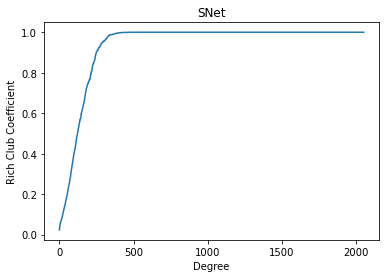

In [102]:
rich_club_report("SNet", SNet)

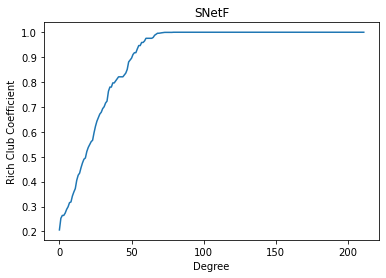

In [103]:
rich_club_report("SNetF", SNetF)

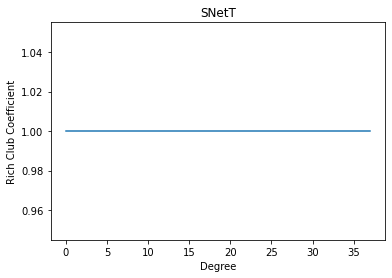

In [104]:
rich_club_report("SNetT", SNetT)

In [105]:
rich_club_report("UserNet", UserNet)

UserNet is directed and as such is not defined.


* There is a pronounced *Rich-club* phenomenon in Snet and SnetF, which was visible from their models where we saw hubs. 
* SnetT is a complete graph, so the coefficiemt is at max value 1.
* UserNet is directed and therefor undefined.

## 14 Degree distribution? *Power-law* distribution? 

<HTML> <BODY> <h3>Degree Distribution Report - Results:</h3> <hr>Average Degree: <b>64.889</b><IMG SRC="data/gephi/SNet/degree-report/degree-distribution.png" WIDTH="500"></IMG></BODY></HTML>

In [190]:
# !pip install powerlaw
import powerlaw

def fit_distribution_comparison(fit, this, that):
    R, p = fit.distribution_compare(this, that)
    r_result = this if R > 0 else that
    print (f"{this} or {that}? - {r_result}")
    print(f"(R={round(R, 5)} > 0 | p={round(p, 10)} < 0.05)")
#     print(f"If Likelihood (R={round(R, 5)}) > 0 then power-law else {other}?\nResult: {r_result}")
#     print(f"If p < 0.05  (p={round(p, 10)}) then there are no fluctuations and R is not determined.")
    print()

def power_law_report(graph_name, graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True) # used for degree distribution and powerlaw test
    fit = powerlaw.Fit(degree_sequence)
    
    fit_distribution_comparison(fit, "power_law", "exponential")
    fit_distribution_comparison(fit, "power_law", "lognormal")
    fit_distribution_comparison(fit, "power_law", "truncated_power_law")
    fit_distribution_comparison(fit, "truncated_power_law", "lognormal")
    
    plt.figure(figsize=(10, 6))
    fig4 = fit.plot_ccdf(linewidth=3, color='black')
    fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--', label="powerlaw") #powerlaw
    fit.truncated_power_law.plot_ccdf(ax=fig4, color='b', linestyle='--', label="truncated powerlaw") # truncated powerlaw
    fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--', label="lognormal") #lognormal
    fit.exponential.plot_ccdf(ax=fig4, color='m', linestyle='--', label="exponential") # truncated powerlaw
    plt.legend(loc="lower left")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
power_law or exponential? - power_law
(R=135.23038 > 0 | p=9.064e-07 < 0.05)

power_law or lognormal? - lognormal
(R=-28.46268 > 0 | p=1.5201e-06 < 0.05)



Assuming nested distributions


power_law or truncated_power_law? - truncated_power_law
(R=-34.13878 > 0 | p=0.0 < 0.05)

truncated_power_law or lognormal? - truncated_power_law
(R=5.67609 > 0 | p=0.0019238869 < 0.05)



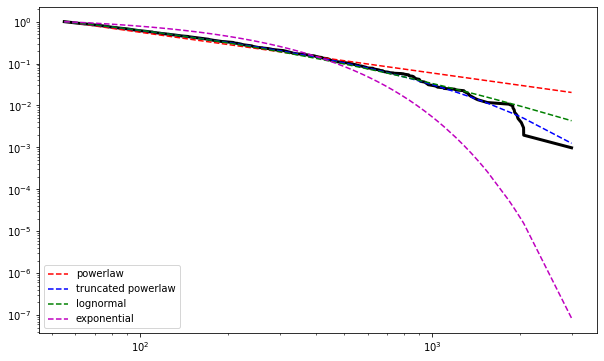

In [191]:
power_law_report("SNet", SNet)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


Calculating best minimal value for power law fit
power_law or exponential? - exponential
(R=-3.74998 > 0 | p=0.0176498432 < 0.05)

power_law or lognormal? - lognormal
(R=-3.44452 > 0 | p=0.0800365462 < 0.05)

power_law or truncated_power_law? - truncated_power_law
(R=-3.28736 > 0 | p=0.0103437248 < 0.05)

truncated_power_law or lognormal? - lognormal
(R=-0.15716 > 0 | p=0.8530370825 < 0.05)



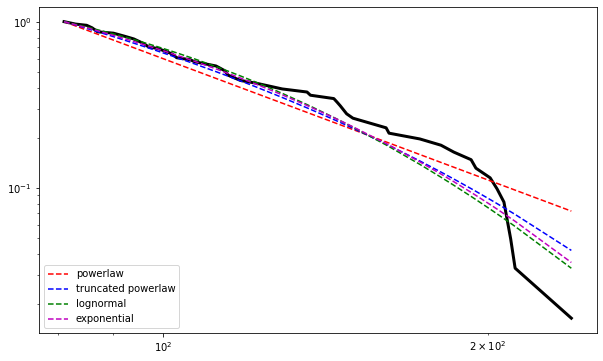

In [192]:
power_law_report("SNetF", SNetF)

Calculating best minimal value for power law fit
power_law or exponential? - exponential
(R=0 > 0 | p=1 < 0.05)

power_law or lognormal? - lognormal
(R=0 > 0 | p=1 < 0.05)

power_law or truncated_power_law? - truncated_power_law
(R=0 > 0 | p=1 < 0.05)

truncated_power_law or lognormal? - lognormal
(R=0 > 0 | p=1 < 0.05)



Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 fo

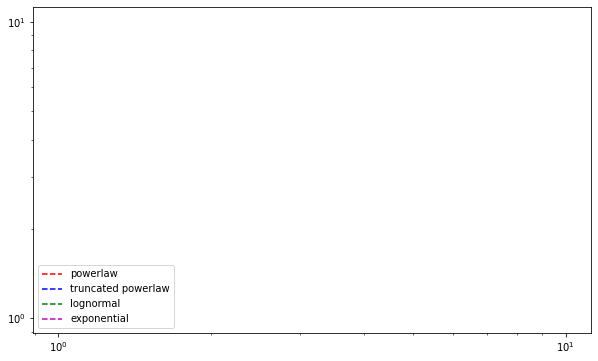

In [193]:
power_law_report("SNetT", SNetT)

Calculating best minimal value for power law fit
power_law or exponential? - power_law
(R=6.37482 > 0 | p=0.165271554 < 0.05)

power_law or lognormal? - lognormal
(R=-0.18261 > 0 | p=0.7125934515 < 0.05)



Assuming nested distributions


power_law or truncated_power_law? - truncated_power_law
(R=-0.24043 > 0 | p=0.4880296608 < 0.05)

truncated_power_law or lognormal? - truncated_power_law
(R=0.05782 > 0 | p=0.5302387835 < 0.05)



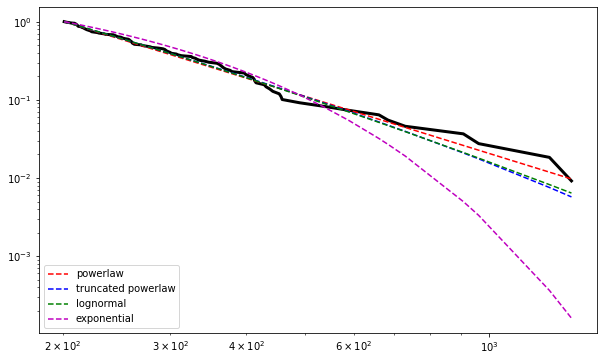

In [194]:
power_law_report("UserNet", UserNet)

### Result interpretation:

| Network      | Description | Decision |
| ----------- | ----------- | ----------- |
| SNet      | Truncated power-law       | Yes |
| SNetF   | Fluctuates between power-law and lognormal        | No |
| SNetT   | NaN        | No |
| UserNet   | Fluctuates too much        | No |

##  15 Most important hubs and authorities? Their distribution, relation and position (core or edge)? 

<HTML> <BODY> <h3> HITS Metric Report - Results </h3><hr><br /><h2> Parameters: </h2>  &#917; = 1.0E-4<br /> 
    <table>
        <tr>
            <td><IMG SRC="data/gephi/SNet/hits-report/hubs.png"></IMG></td>
            <td><IMG SRC="data/gephi/SNet/hits-report/authorities.png"></IMG></td>
        </tr>
        <tr>
            <td colspan="2"><IMG SRC="data/gephi/SNet/hits-report/hub_model1.png" widht="500"></IMG></td>
        </tr>
    </table><br /></BODY> </HTML>

## Graph analysis

I'm going to write functions in order to avoid code duplication. Aftwer these methods, I will write the answers seperated by networks.

> Yeah didn't happen :(

In [ ]:
graph_names = ["SNet", "SnetF", "SnetT", "UserNet"]
graphs = [SNet, SNetF, SNetT, UserNet]

graph_to_name = list(zip(graphs, graph_names))